In [3]:
import numpy as np
import os
import sys       

# Get the path of the parent_directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
excel_dir = parent_dir + "/data/raw/excel_files"
seg_dir = parent_dir + "/data/interim/segmented_csv"

# Append the parent_directory to sys.path
sys.path.append(parent_dir)

%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

plotting_en = True
run_all_subs = False

%load_ext autoreload
%autoreload 2

In [7]:
# Creating a list of subjects in excel directory
excel_dir_subs = bin_file_paths = os.listdir(excel_dir)
excel_dir_subs = [excel_dir + '/' + s for s in excel_dir_subs]

# Excluding the folder for ipynb checkpoints
for i in range(len(excel_dir_subs)):
    if '.ipynb' in excel_dir_subs[i]:
        del excel_dir_subs[i]
        break

In [13]:
excel_dir_subs[0]

'/home/michael/Code/mims-transformer-stress-classification/data/raw/excel_files/sub3160'

In [9]:
df_patch = pd.read_csv(excel_dir_subs[0] + '/df_patch.csv')
df_timestamps = pd.read_csv(excel_dir_subs[0] + '/df_timestamps.csv')

In [11]:
# Subtracting rest_2_start to set beginning at 0
df_patch['time'] = df_patch['time'] - df_timestamps['timestamp'][3]
df_timestamps['timestamp'] = df_timestamps['timestamp'] - df_timestamps['timestamp'][3]

In [12]:
print(df_timestamps)

    Unnamed: 0                    ts_name             datetime  timestamp
0            0         patch_placed_start  2022-07-26 09:01:00    -9789.0
1            0               rest_1_start  2022-07-26 11:04:00    -2409.0
2            0                 rest_1_end  2022-07-26 11:26:22    -1067.0
3            0               rest_2_start  2022-07-26 11:44:09        0.0
4            0                 rest_2_end  2022-07-26 12:09:49     1540.0
5            0               script_start  2022-07-26 12:24:52     2443.0
6            0            prep_2min_start  2022-07-26 12:28:44     2675.0
7            0        speaking_3min_start  2022-07-26 12:30:52     2803.0
8            0          speaking_3min_end  2022-07-26 12:33:51     2982.0
9            0       recovery_20min_start  2022-07-26 12:33:55     2986.0
10           0  recovery_20min_poststress  2022-07-26 12:58:30     4461.0


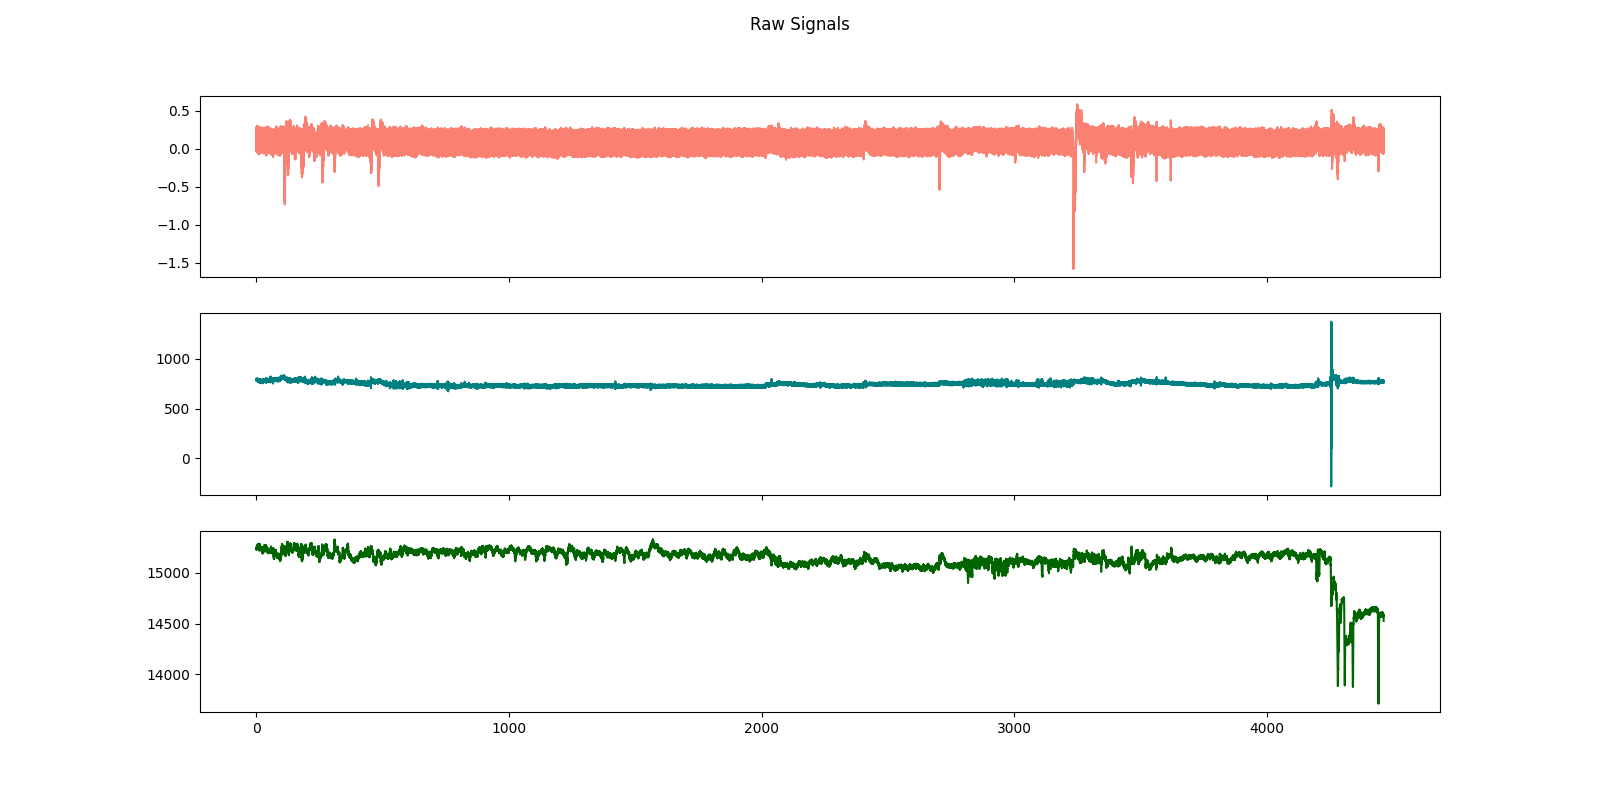

In [9]:
# Plotting entire raw signal from csv file
if plotting_en:
    fig,axs = plt.subplots(3,1, sharex=True, figsize=(16,8))
    plt.suptitle("Raw Signals")
    axs[0].plot(df_patch['time'], df_patch['ECG'], color='salmon')
    axs[1].plot(df_patch['time'], df_patch['accelZ'], color='teal')
    axs[2].plot(df_patch['time'], df_patch['ppg_ir_2'], color='darkgreen')
    plt.show()

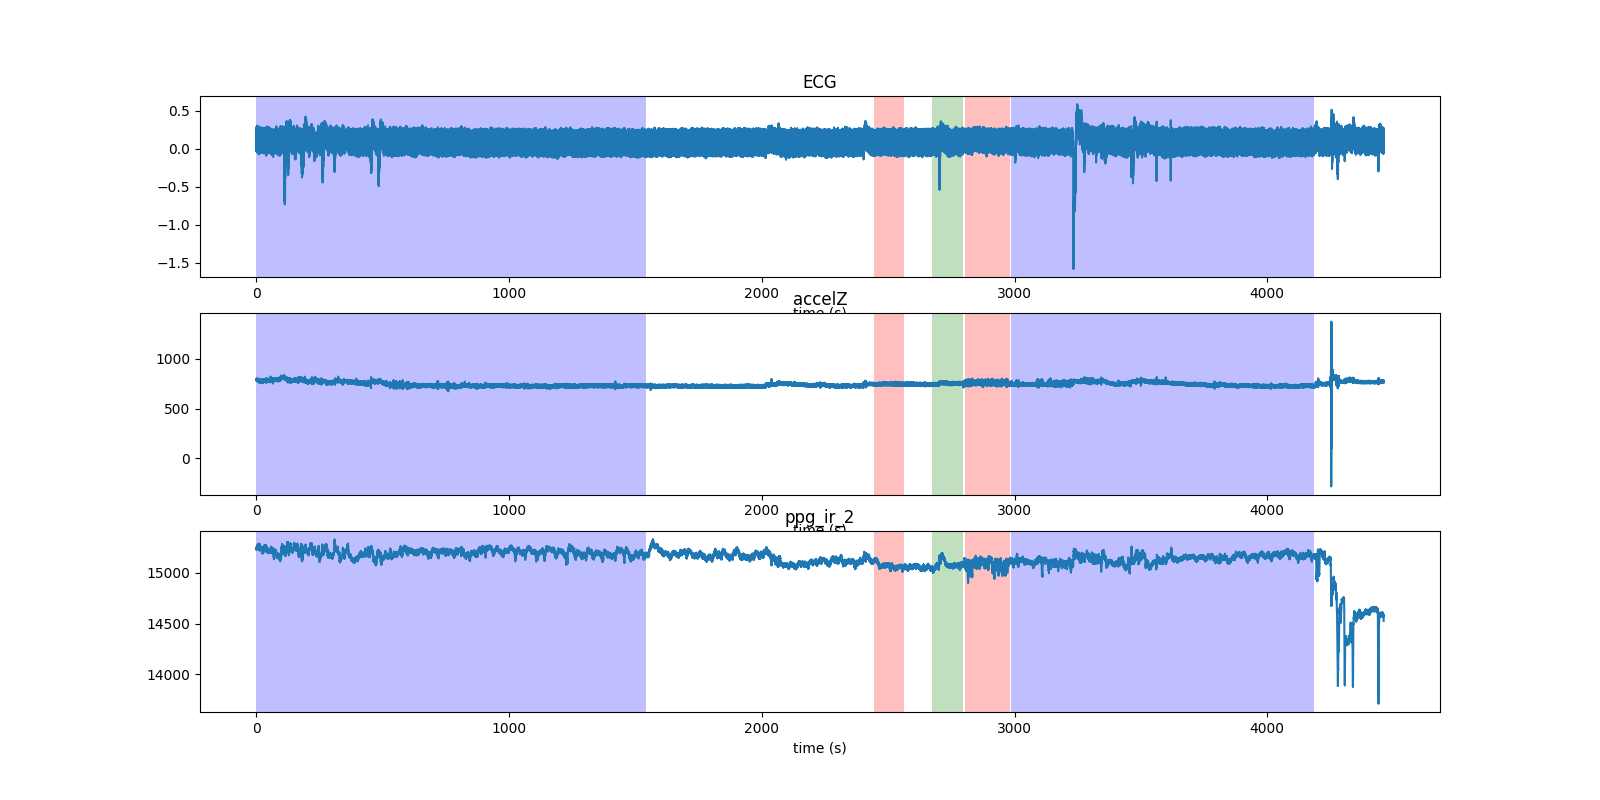

In [14]:
%matplotlib widget
if plotting_en:
    alpha = 0.25
    
    # fig, axs = plt.subplots(10, 1, figsize = (30, 10))
    # signal_strings = ['ECG', 'accelZ', 'accelY', 'accelX', 'ppg_ir_1', 'ppg_r_1', 'ppg_g_1', 'ppg_ir_2', 'ppg_r_2', 'ppg_g_2']
    
    fig, axs = plt.subplots(3, 1, figsize = (16, 8))
    signal_strings = ['ECG', 'accelZ', 'ppg_ir_2']
    
    for i, signal_string in enumerate(signal_strings):
    
            # plot the signal 
            axs[i].plot(df_patch['time'], df_patch[signal_string])
            axs[i].set_title(signal_string)
            axs[i].set_xlabel('time (s)')
    
            # mark the bounds of important events 
            axs[i].axvspan(df_timestamps['timestamp'][3], df_timestamps['timestamp'][4], facecolor='b', alpha=0.25)
            axs[i].axvspan(df_timestamps['timestamp'][5], df_timestamps['timestamp'][5] + 120, facecolor='r', alpha=0.25)
            axs[i].axvspan(df_timestamps['timestamp'][6], df_timestamps['timestamp'][6] + 120, facecolor='g', alpha=0.25)
            axs[i].axvspan(df_timestamps['timestamp'][7], df_timestamps['timestamp'][8], facecolor='r', alpha=0.25)
            axs[i].axvspan(df_timestamps['timestamp'][9], df_timestamps['timestamp'][9] + 1200, facecolor='b', alpha=0.25)

In [12]:
# for sub in excel_dir_subs:
#     df_patch = pd.read_csv(sub + '/df_patch.csv')
#     df_timestamps = pd.read_csv(sub + '/df_timestamps.csv')

#     # Subtracting rest_2_start to set beginning at 0
#     df_patch['time'] = df_patch['time'] - df_timestamps['timestamp'][3]
#     df_timestamps['timestamp'] = df_timestamps['timestamp'] - df_timestamps['timestamp'][3]

In [14]:
# Indicies for start and stop times (index loc) of activities
rest_2_start = 0
rest_2_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][4])
script_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][5])
script_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][5] + 120)
prep_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][6])
prep_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][6] + 120)
speaking_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][7])
speaking_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][8])
recovery_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][9])
recovery_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][9] + 1200)

In [15]:
df_rest_2 = df_patch.loc[rest_2_start:rest_2_end]
df_script = df_patch.loc[script_start:script_end]
df_prep = df_patch.loc[prep_start:prep_end]
df_speaking = df_patch.loc[speaking_start:speaking_end]
df_recovery = df_patch.loc[recovery_start:recovery_end]

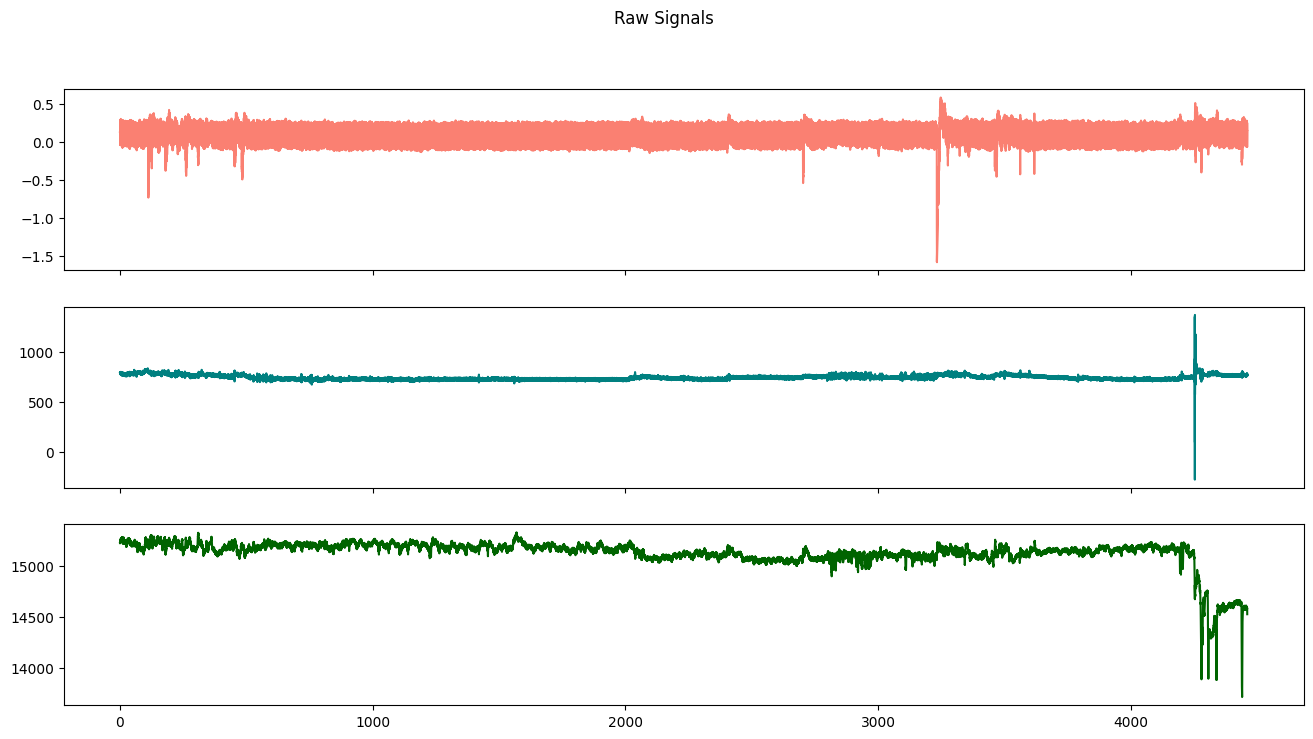

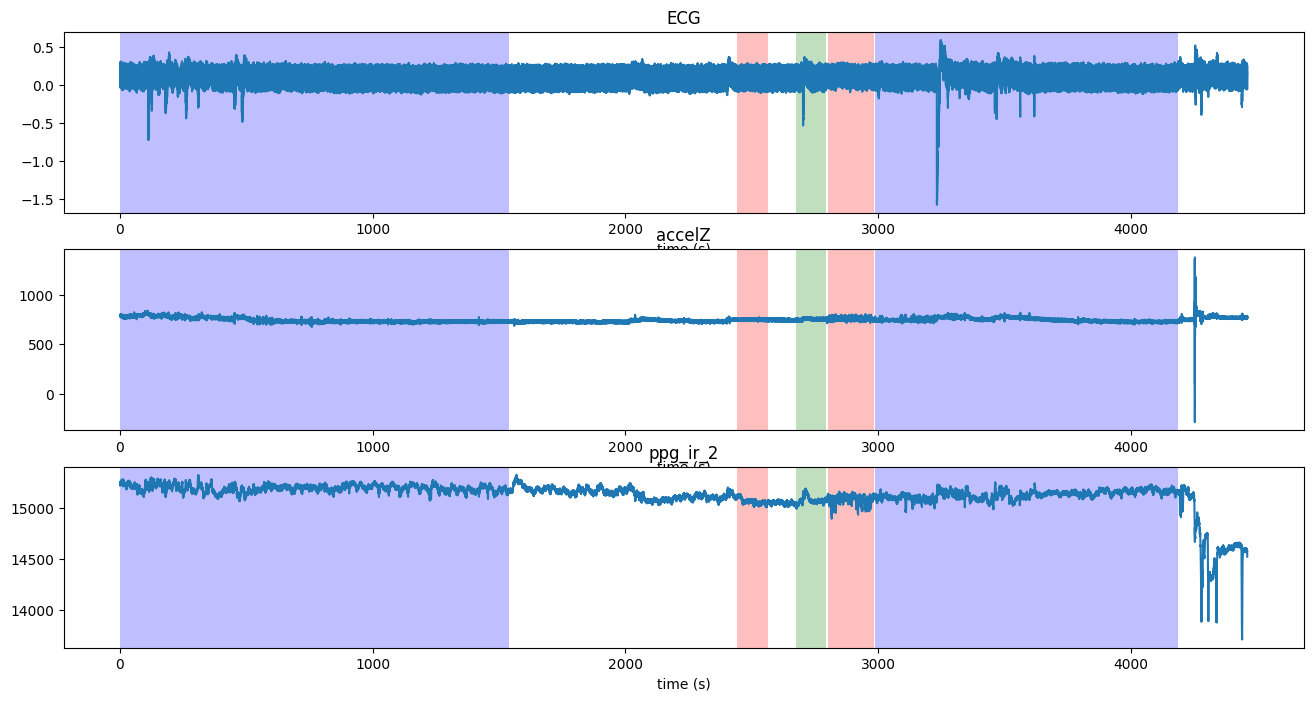

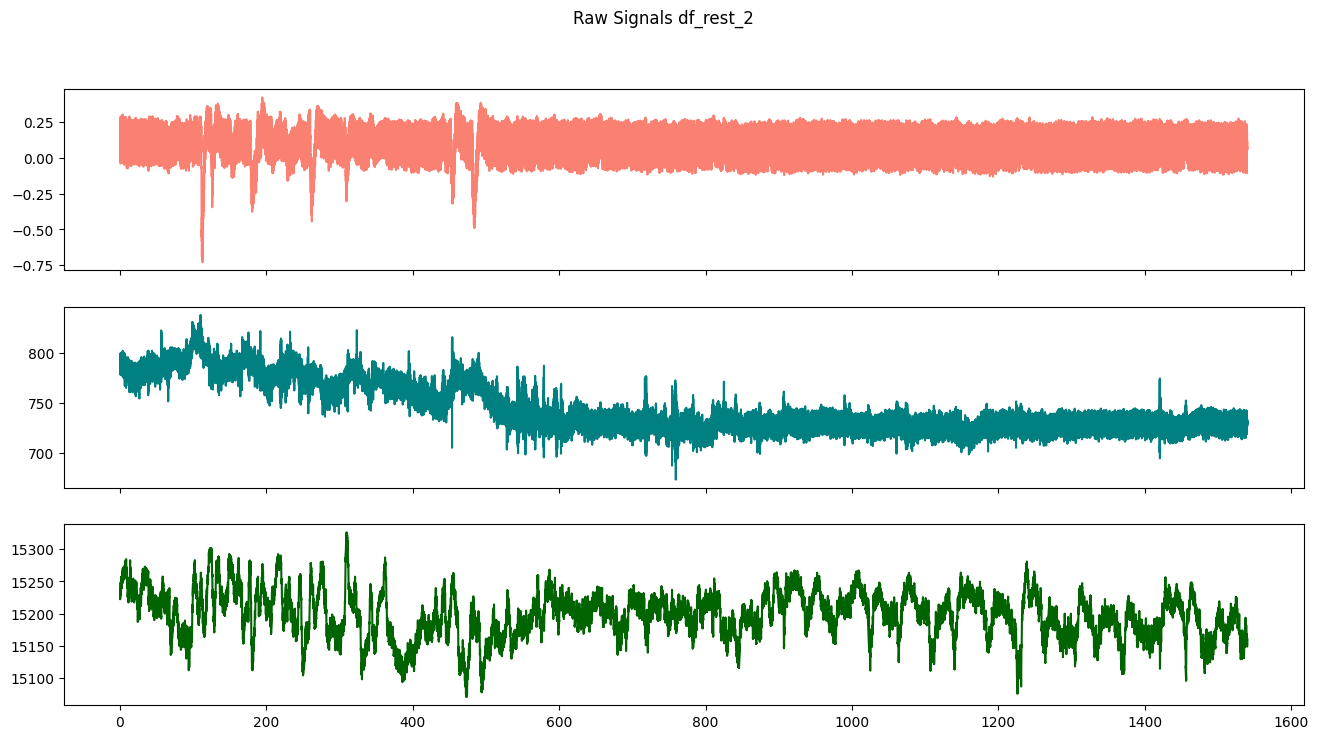

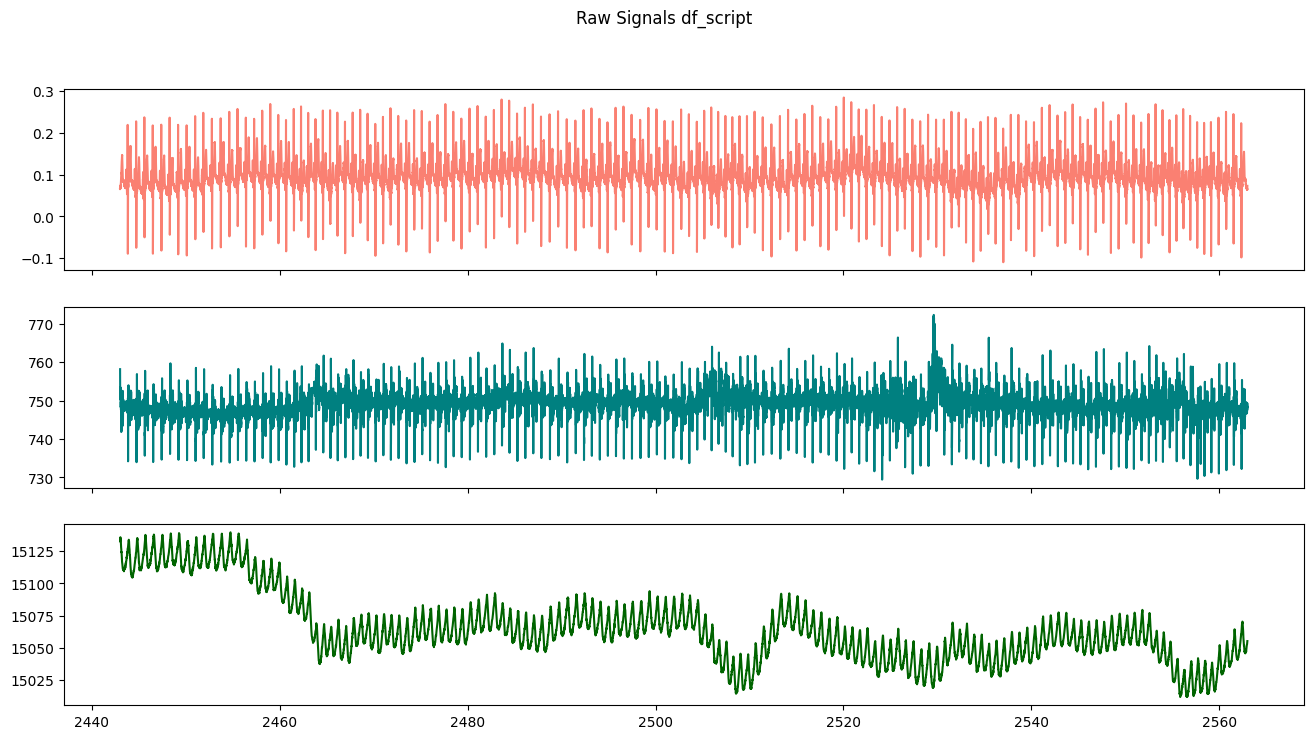

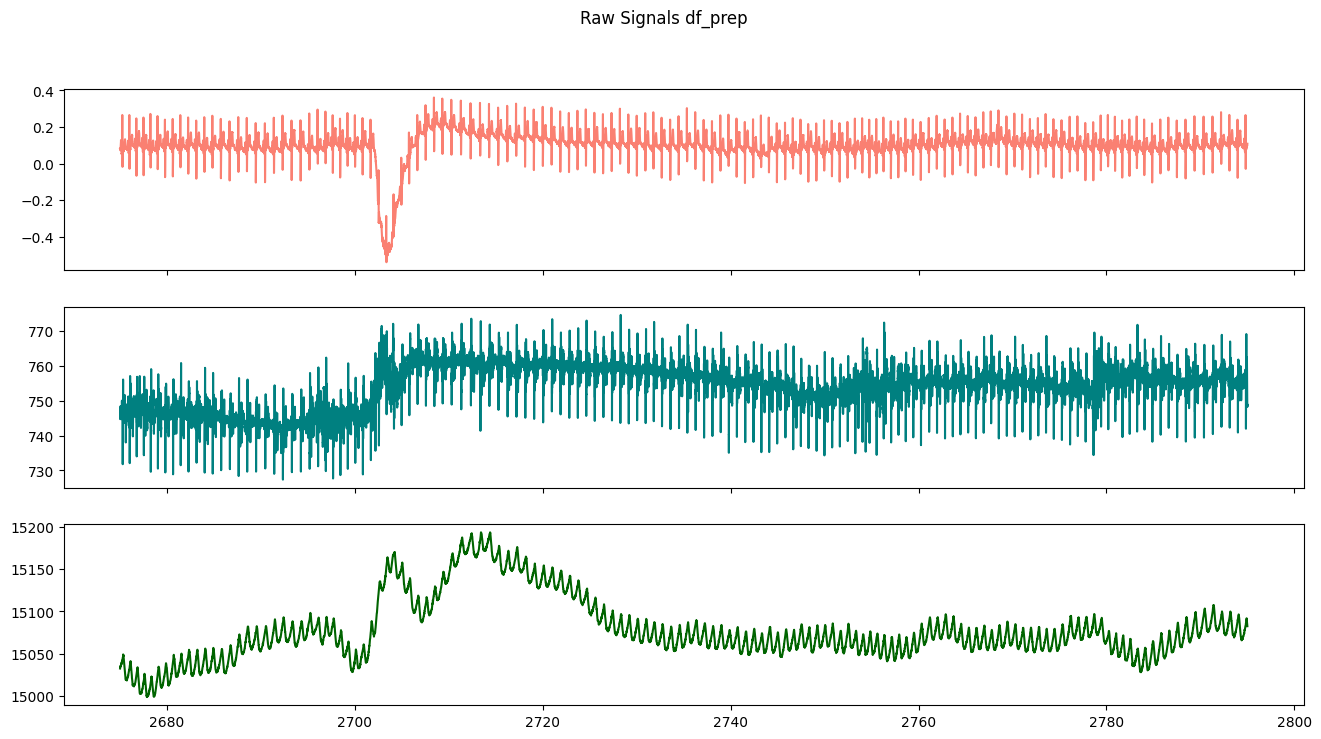

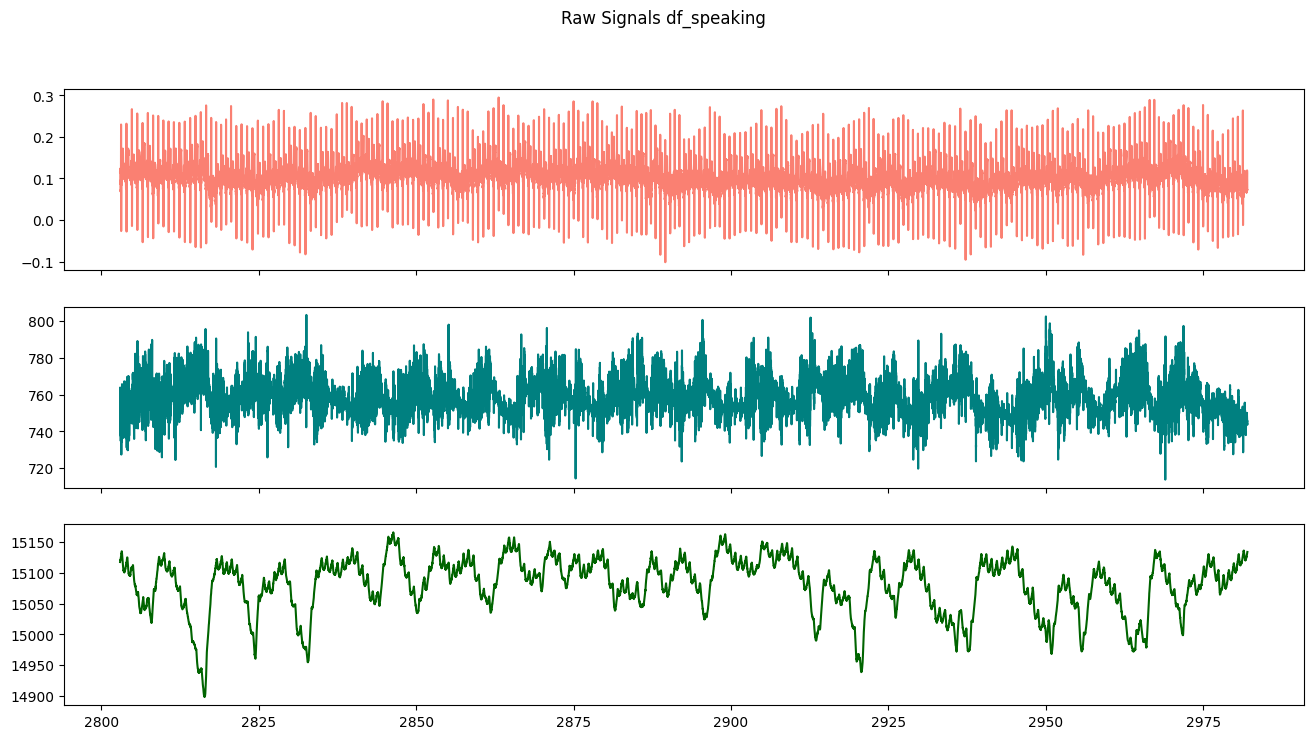

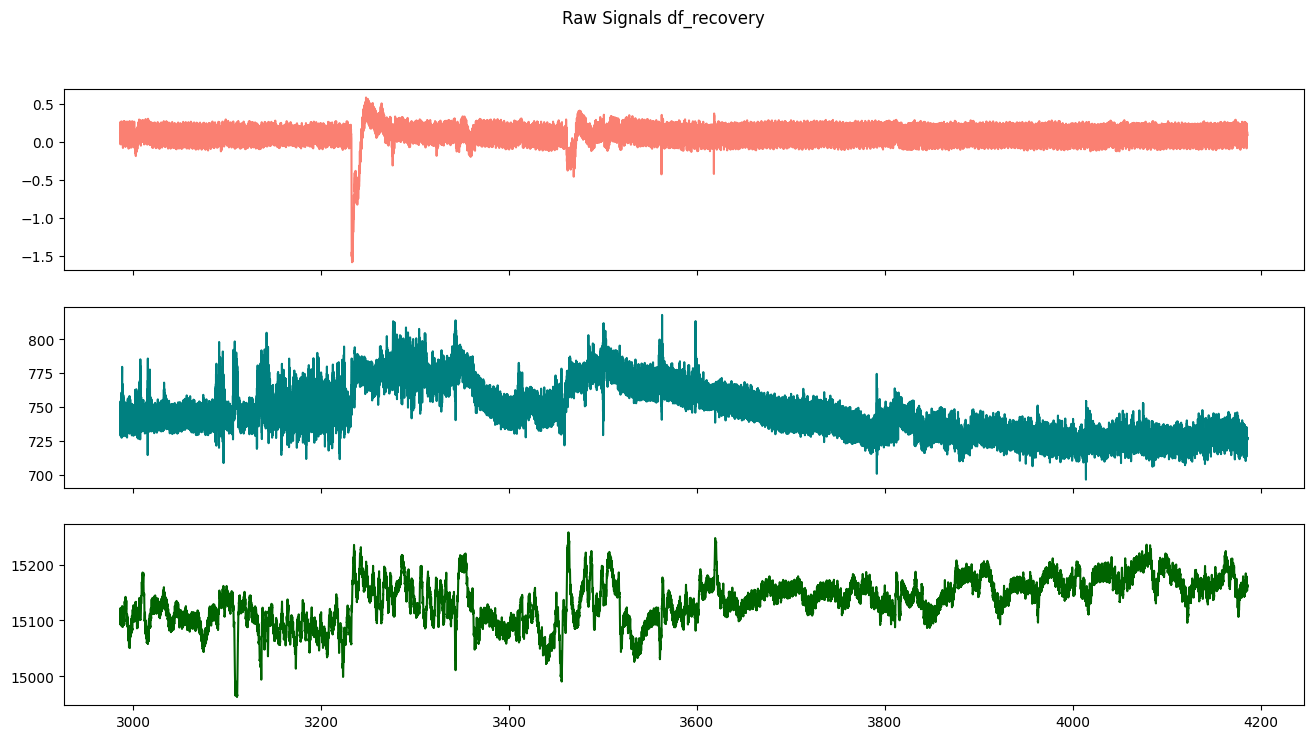

In [16]:
%matplotlib inline
activities = [df_rest_2,df_script,df_prep,df_speaking,df_recovery]
act_titles = ['df_rest_2','df_script','df_prep','df_speaking','df_recovery']

for i in range(len(activities)):
    if plotting_en:
        fig,axs = plt.subplots(3,1, sharex=True, figsize=(16,8))
        plt.suptitle(f"Raw Signals {act_titles[i]}")
        axs[0].plot(activities[i]['time'], activities[i]['ECG'], color='salmon')
        axs[1].plot(activities[i]['time'], activities[i]['accelZ'], color='teal')
        axs[2].plot(activities[i]['time'], activities[i]['ppg_ir_2'], color='darkgreen')
plt.show()

In [19]:
import pickle
import os

save_dir = os.getcwd() + "/Activity_Raw_Segmented"
if not os.path.exists(save_dir + "/sub_temp"):
    os.makedirs(save_dir + "/sub_temp")
    
for i in range(len(activities)):
    with open (f"{save_dir}/sub_temp/{act_titles[i]}.pkl", "wb") as f:
        pickle.dump(activities[i], f)

In [15]:
# import pickle
# import os
# remove_subs = [0,1,2,3,4,5,6,7,8]
# if run_all_subs:

#     for sub in range(len(excel_dir_subs)):
#         if sub in remove_subs:
#             continue
#         print(str(sub) + ": " + excel_dir_subs[sub])
#         df_patch = pd.read_csv(excel_dir_subs[sub] + '/df_patch.csv')
#         df_timestamps = pd.read_csv(excel_dir_subs[sub] + '/df_timestamps.csv')
        
#         # Subtracting rest_2_start to set beginning at 0
#         df_patch['time'] = df_patch['time'] - df_timestamps['timestamp'][3]
#         df_timestamps['timestamp'] = df_timestamps['timestamp'] - df_timestamps['timestamp'][3]
        
#         # Indicies for start and stop times (index loc) of activities
#         rest_2_start = 0
#         rest_2_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][4])
#         script_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][5])
#         script_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][5] + 120)
#         prep_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][6])
#         prep_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][6] + 120)
#         speaking_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][7])
#         speaking_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][8])
#         recovery_start = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][9])
#         recovery_end = next(x for x, val in enumerate(df_patch['time']) if val > df_timestamps['timestamp'][9] + 1200)
        
#         df_rest_2 = df_patch.loc[rest_2_start:rest_2_end]
#         df_script = df_patch.loc[script_start:script_end]
#         df_prep = df_patch.loc[prep_start:prep_end]
#         df_speaking = df_patch.loc[speaking_start:speaking_end]
#         df_recovery = df_patch.loc[recovery_start:recovery_end]
        
#         activities = [df_rest_2,df_script,df_prep,df_speaking,df_recovery]
#         act_titles = ['df_rest_2','df_script','df_prep','df_speaking','df_recovery']
        
#         save_dir = os.getcwd() + "/Activity_Raw_Segmented"
#         if not os.path.exists(save_dir + f"/{sub}"):
#             os.makedirs(save_dir + f"/{sub}")
            
#         for i in range(len(activities)):
#             with open (f"{save_dir}/{sub}/{act_titles[i]}.pkl", "wb") as f:
#                 pickle.dump(activities[i], f)

9: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub6049
10: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub6048
11: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3154
12: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3150
13: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3135
14: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3130
15: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3137
16: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3152
17: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3141
18: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3136
19: /home/michael/Code/BMED_MIMS_DeepLearning/MIMS_Dataset/Raw_Data/excel_files/sub3128
20: /home/michael/Code/BMED_MIMS_